In [1]:
## Importing all libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
Loan1 = pd.read_csv(r'C:\Users\piyus\OneDrive\Desktop\ML and AI\Notebooks\Lending Club Study\loan.csv',error_bad_lines=False, index_col=False, dtype='unicode')

**Data understanding**

Display all stubs to review them and have basic understanding of thier datatype.

In [4]:
Loan1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,

In [5]:
Loan1.shape

(39717, 111)

In [6]:
## Total 111 Variables in our dataframe.
Loan1.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,37258,38642,39717,39717,39717,39717,39717,39717,39717,26777,39717,39706,39717,39717,39717,39717,39717,39717,14035,2786,39717,39717,39717,39667,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39646,39717,1140,39715,39661,0,39717,39717,0,0,0,39717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39661,39717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39020,39678,0,0,0,0
unique,39717,39717,885,1041,8205,2,371,15383,7,35,28820,11,5,5318,3,55,3,1,39717,26527,14,19615,823,50,2868,11,526,9,95,111,40,5,21711,1089,82,1,1137,1138,37850,37518,7976,35148,1356,4040,2616,101,34930,2,106,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0
top,731690,1022488,10000,10000,5000,36 months,10.99%,311.11,B,B3,US Army,10+ years,RENT,60000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,0,0,Nov-98,0,0,0,7,0,0,0%,16,f,0,0,11196.56943,0,10000,0,0,0,0,May-16,0,Jun-16,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
freq,1,1,2833,2741,1309,29096,956,68,12020,2917,134,8879,18899,1505,16921,2260,32950,39717,1,210,18641,2184,597,7099,183,35405,370,19300,443,670,4018,37601,994,977,1471,39717,38577,38577,26,165,2293,71,37671,35499,35935,1256,74,1125,10308,39661,NaN,39717,39717,NaN,NaN,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39661,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37339,39678,NaN,NaN,NaN,NaN


**loan_status, purpose, term, application_type, verification_status, emp_length... etc** are some of the variables we have identified as important in our initial review of our dictionary and will run analysis on all of them along with couple of other variables.

In [7]:
Loan1[['loan_status','purpose','term','application_type', 'verification_status', 'emp_length', 'annual_inc']].describe()

,loan_status,purpose,term,application_type,verification_status,emp_length,annual_inc
count,39717,39717,39717,39717,39717,38642,39717
unique,3,14,2,1,3,11,5318
top,Fully Paid,debt_consolidation,36 months,INDIVIDUAL,Not Verified,10+ years,60000
freq,32950,18641,29096,39717,16921,8879,1505


**Data Cleaning and Manipulation**

Before running our analysis, let us clean/manipulate this data by ourselves and remove Null values, Outliers, incorrect datatypes Etc...

In [8]:
#Checking for % of missing values...
missing = round(100*(Loan1.isnull().sum()/len(Loan1.id)), 2)
missing.loc[missing > 0]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

In [9]:
##Dropping all the files with more than 40% of missing values as per our collabortive call.
Col_Missing = list(missing[missing >= 40].index)
Loan2 = Loan1.drop(Col_Missing,axis=1)

In [10]:
## Total 54 Variables remaining in our new dataframe.
Loan2.shape

(39717, 54)

In [11]:
## Checking if all are cleared?
Loan2.isnull().all()

id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
term                          False
int_rate                      False
installment                   False
grade                         False
sub_grade                     False
emp_title                     False
emp_length                    False
home_ownership                False
annual_inc                    False
verification_status           False
issue_d                       False
loan_status                   False
pymnt_plan                    False
url                           False
desc                          False
purpose                       False
title                         False
zip_code                      False
addr_state                    False
dti                           False
delinq_2yrs                   False
earliest_cr_line              False
inq_last_6mths              

In [12]:
Loan2.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0


Checking if values needs to be imputated in other remaing variables

In [13]:
missing = round(100*(Loan2.isnull().sum()/len(Loan2.id)), 2)
missing.loc[missing != 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [14]:
## Dropping desc due to many null values and low level of data impact and also other two stubs as they do not have any significant impact on data.
Loan3 = Loan2.drop(['desc', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths'],axis=1)

In [15]:
Loan3.shape

(39717, 51)

Removing all the rows where higher number of values are NULL for remaining categories to avoid skewing of data by imputation. As we have total of 39717 columns this seems to be fine.

In [16]:
Loan3=Loan3[~Loan3.emp_title.isnull()]
Loan3=Loan3[~Loan3.emp_length.isnull()]
Loan3=Loan3[~Loan3.pub_rec_bankruptcies.isnull()]

In [17]:
missing = round(100*(Loan3.isnull().sum()/len(Loan3.id)), 2) 
missing[missing != 0]

title           0.02
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

In [18]:
Loan3=Loan3[~Loan3.title.isnull()]
Loan3=Loan3[~Loan3.revol_util.isnull()]
Loan3=Loan3[~Loan3.last_pymnt_d.isnull()]

In [19]:
#missing = round(100*(Loan3.isnull().sum()/len(Loan3.id)), 2) 
#missing[missing != 0]
# DATA IS CLEARED and we can start processing/analysis on it.

### Data Analysis

Analyzing/Processing data to create Univariate, Bivariate and Derived data analysis.

In [20]:
Loan3.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1,0,Apr-99,5,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20,0,Feb-96,1,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0,0,0,May-16,67.79,May-16,1,INDIVIDUAL,0,0,0,0
5,1075269,1311441,5000,5000,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.2,0,Nov-04,3,9,0,7963,28.30%,12,f,0,0,5632.21,5632.21,5000,632.21,0,0,0,Jan-15,161.03,Jan-16,1,INDIVIDUAL,0,0,0,0
6,1069639,1304742,7000,7000,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,f,0,0,10110.84,10110.84,6985.61,3125.23,0,0,0,May-16,1313.76,May-16,1,INDIVIDUAL,0,0,0,0


Processing data so that we can work on it and run analysis.

In [21]:
Loan3['term'] = Loan3['term'].str.rstrip('months')

In [22]:
Loan3['int_rate'] = Loan3['int_rate'].str.rstrip('%')
Loan3['revol_util'] = Loan3['revol_util'].str.rstrip('%')

In [23]:
Loan3['emp_length'] = Loan3['emp_length'].str.rstrip('years ')
Loan3['emp_length'].replace({'10+': '10'}, inplace=True)
Loan3['emp_length'][Loan3['emp_length'] == '< 1'] = '0.9'

Converting object datatypes to Float

In [24]:
columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'dti', 
          'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
          'total_rec_late_fee', 'recoveries', 'collection_recovery_fee','emp_length']
Loan3[columns] = Loan3[columns].astype(np.float)

----------------------------------------------------------------------------------------------------

In [25]:
#Checking unique counts in our data frame
Loan3.nunique().sort_values()

tax_liens                      1
delinq_amnt                    1
acc_now_delinq                 1
application_type               1
policy_code                    1
pymnt_plan                     1
initial_list_status            1
term                           2
loan_status                    3
verification_status            3
pub_rec_bankruptcies           3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp 

# Univariate Analysis

In [26]:
#Loan3.head()
Loan3["loan_status"].value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

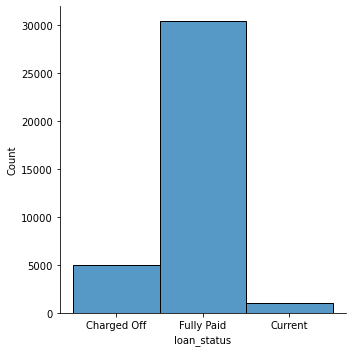

In [48]:
sns.displot(Loan3.loan_status,bins = 20,kde=False)
plt.show()

In [28]:
len(Loan3.loc[Loan3.loan_status == "Charged Off"])

4943

In [29]:
Percentage = round(100*(len(Loan3.loc[Loan3.loan_status == "Current"])/len(Loan3.id)), 2)
Percentage

2.93

Maximum amount of loans in our data are Fully Paid and closed off. About **13.57%** of loans are charged off and **3%** loans are Currently running.

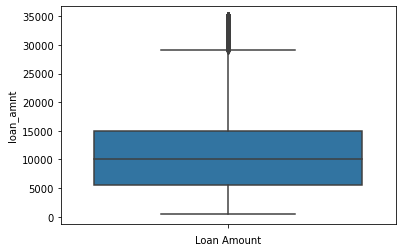

In [30]:
#sns.displot(Loan3.loan_amnt)
sns.boxplot(y = Loan3.loan_amnt)
plt.xlabel('Loan Amount')
plt.show()

Average amount of loans are between 5000 to 15000 with higher end of our bandwidth being 30000.

In [31]:
Loan3.verification_status.value_counts()

Not Verified       15056
Verified           11926
Source Verified     9451
Name: verification_status, dtype: int64

Values of verification status are equally distributed so we believe there are not many insight to be derived from this using Univariate analysis.

# Segmented Univariate Analysis

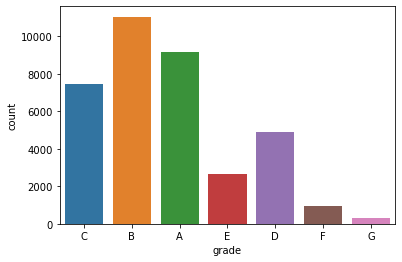

In [50]:
sns.countplot(x='grade', data=Loan3)
plt.show()

Most of the loans have grade of A and B. Therefore stating most of the loans are high graded loans

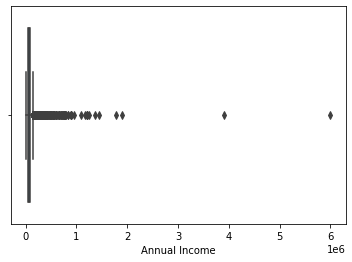

In [32]:
sns.boxplot(x=Loan3['annual_inc'])
plt.xlabel('Annual Income')
plt.show()

Too many outliers in the data. I believe we should impute this data close using IQR.

In [33]:
annual_inc_IQR = Loan3['annual_inc'].quantile(.75) - Loan3['annual_inc'].quantile(.25)
annual_inc_IQR

41000.0

In [34]:
#Calculating what is our Outlier Range.
Loan3['annual_inc'].quantile(0.75) + 1.5 * Loan3['annual_inc'].quantile(.75) - Loan3['annual_inc'].quantile(.25)

165500.0

In [35]:
len(Loan3.loc[Loan3['annual_inc'] > 165500])

1040

About 1/36 of all respondents are above Outlier range. Imputing this data will lead to skewing of our Analysis. 
Therefore it is best to drop these respondents.

In [36]:
Loan4 = Loan3.loc[Loan3['annual_inc'] <= 165500]

In [37]:
Loan4.shape

(35393, 51)

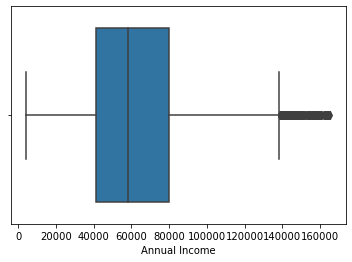

In [38]:
sns.boxplot(x=Loan4['annual_inc'])
plt.xlabel('Annual Income')
plt.show()

 Average person who avails loan earns upto 60000$

In [39]:
Loan4.emp_length.value_counts()

10.0    8078
2.0     4063
0.9     3970
3.0     3819
4.0     3216
5.0     3044
1.0     2956
6.0     2068
7.0     1655
8.0     1348
9.0     1176
Name: emp_length, dtype: int64

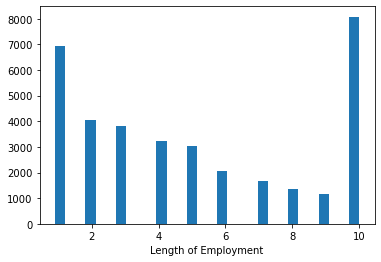

In [40]:
plt.hist(Loan4.emp_length, bins = 30)
plt.xlabel('Length of Employment')
plt.show()

You can see people tend to avail loans when they have just joined an organization and started working.

- We believe people who have less than 2 years of experience have needs and usually will take loans for their personal cause
- People who have more than 10 years of experinece have usually higher lot of cluster i.e. all those who have 10, 12, 15, 18 years of experience.
- ***It is safe to say lower age leads to higher changes of someone availing loan.***

# Bivariate Analysis

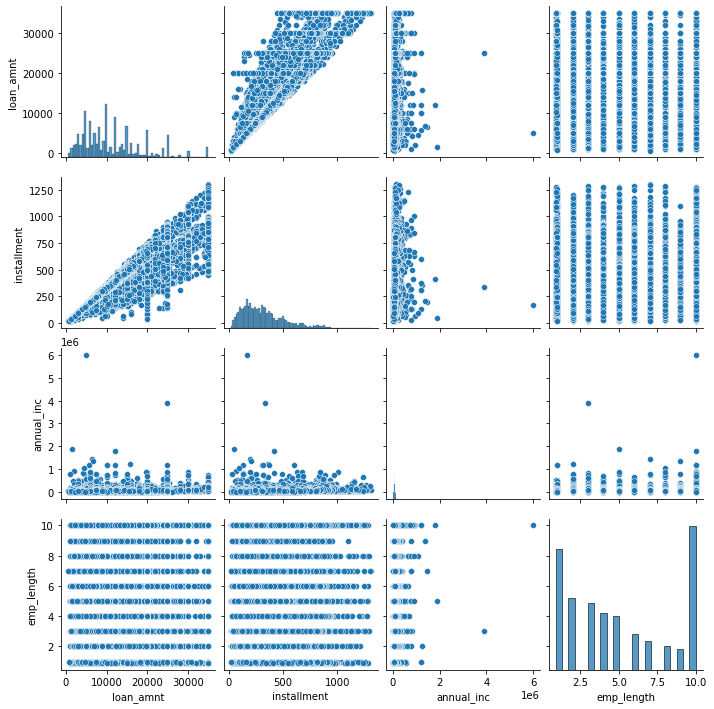

In [41]:
#Checking relation between couple of variables using pairplot
sns.pairplot(Loan3[['loan_amnt','installment', 'annual_inc', 'emp_length']])
plt.show()

There seems to be no significant correlation between these variables. Except Installments and Loan_amount which is an obvious trend.
However we see loans are given to people irrespective of their annual income.

# Derived Analysis

## Checking the thesis of people are likely to default if they have low annaul_income and highamount of loan.



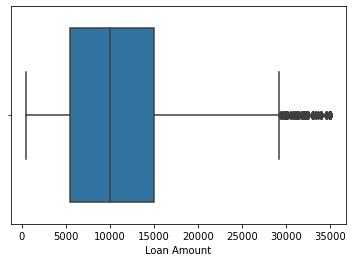

In [42]:
sns.boxplot(x=Loan4['loan_amnt'])
plt.xlabel('Loan Amount')
plt.show()

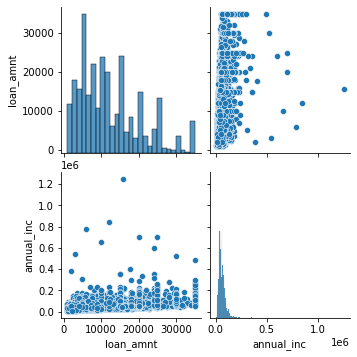

In [43]:
## This is dataframe for defaulter.
Defaulter_df = Loan3.loc[Loan3.loan_status == "Charged Off"]
sns.pairplot(Defaulter_df[['loan_amnt', 'annual_inc']])
plt.show()



## Checking Correlation between all variables.

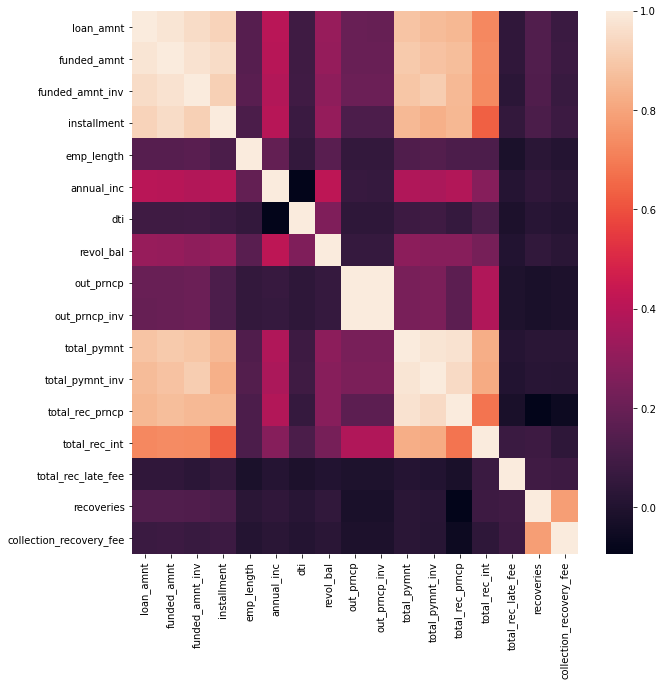

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(Loan4.corr())
plt.show()

In [46]:
#Making variable for ratio between funded amount till data and annual income 
Loan4['loan_inc_ratio'] = Loan4.funded_amnt*100/Loan4.annual_inc

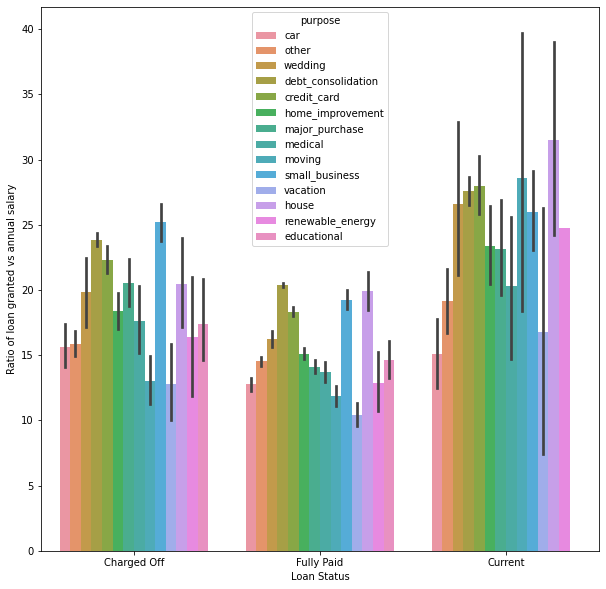

In [47]:
plt.figure(figsize=(10,10))

sns.barplot(x='loan_status',y='loan_inc_ratio',hue='purpose',data=Loan4)
plt.xlabel('Loan Status')
plt.ylabel('Ratio of loan granted vs annual salary')
plt.show()

- This chart can give us insights that most common type of loan is small businesses which is also a volatile type of loan. If the business fails then there is no way someone follows through and pays entire loan. 
- The second insight is home loan is second most common type of loan and it is very secure return on investment.